In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
data_tariffs = pd.read_csv('tariffs.csv')
data_calls = pd.read_csv('calls.csv')
data_internet = pd.read_csv('internet.csv')
data_messages = pd.read_csv('messages.csv')
data_users = pd.read_csv('users.csv')

### Информация о звонках

In [81]:
display(data_calls.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [82]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [83]:
data_calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [84]:
data_calls.duplicated().sum()

0

Описание данных таблицы `data_calls`:
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Данные полные, пропусков и дубликатов нет. Некорректных значений не обнаружено. 

Замечания:
- в столбце `call_date` тип данных необходимо заменить на **datetime**;
- длительность звонка в столбце `duration` можно представить целым числом, так как компания округляет секунды до минут, и изменить тип данных на `int`.

### Информация о сообщениях

In [85]:
display(data_messages.head())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [86]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [87]:
data_messages.duplicated().sum()

0

Описание данных таблицы `data_message`:
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Данные полные, пропусков и дубликатов нет. Некорректных значений не обнаружено.

Замечания:

- в столбце `massage_date` тип данных необходимо заменить на datetime.

### Информация об интернет-сессиях

In [88]:
display(data_internet.head())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [89]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [90]:
data_internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

In [91]:
data_internet.duplicated().sum()

0

Описание данных таблицы `data_internet`:
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Данные полные, пропусков и дубликатов нет. Некорректных значений не обнаружено.

Замечания:

- обнаружен столбец, не указанный в документации, и не несущий важной информации — `Unnamed: 0` — нужно удалить его;
- в столбце `session_date` тип данных необходимо заменить на **datetime**;
- объем мегабайт за одну сессию в столбце `mb_used` можно представить целым числом, так как компания округляет результаты в бОльшую сторону, и изменить тип данных на `int`.

### Информация о пользователях

In [92]:
display(data_users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [93]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [94]:
data_users['age'].describe()

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

In [95]:
data_users.duplicated().sum()

0

Описание данных таблицы `data_users`:
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

Данные полные, пропуски в столбце `churn_date` обусловлены количеством отказавшихся от тарифа пользователей — их всего 38. Некорректных значений и дубликатов не обнаружено.

Замечания:

- в столбцах `reg_data` и `churn_date` тип данных необходимо заменить на **datetime**;
- заменим значения NaN в столбце `churn_date` на 0.

Проверим и таблицу с информацией о тарифах на соответствие данных их типам.

In [96]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Все типы соответствуют представленным данным.

## Подготовка пользовательских данных

Изменим типы данных во всех столбцах с датами:

In [97]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'])
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'])
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'])
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'])
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'])
data_calls.info()
data_internet.info()
data_messages.info()
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), objec

Округлим значения длительности звонка и изменим тип данных столбца:

In [98]:
data_calls['duration'] = np.ceil(data_calls['duration']).astype('int')
display(data_calls.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


Удалим лишний столбец в таблице `data_internet`, округлим значения потраченных мегабайт и заменим тип данных столбца:

Удалим лишний столбец в таблице `data_internet`, переведем мегабайты в гигабайты, округлим значения и заменим тип данных столбца:

In [99]:
data_internet.drop('Unnamed: 0', axis=1, inplace=True)
#data_internet['mb_used'] = np.ceil(data_internet['mb_used']).astype('int')
data_internet['mb_used'] = np.ceil(data_internet['mb_used'] / 1024).astype('int')
data_internet = data_internet.rename(columns={'id': 'id', 'mb_used': 'gb_used', 'session_date': 'session_date', 'user_id': 'user_id'})
display(data_internet.head())

,id,gb_used,session_date,user_id
0,1000_0,1,2018-11-25,1000
1,1000_1,2,2018-09-07,1000
2,1000_2,2,2018-06-25,1000
3,1000_3,1,2018-08-22,1000
4,1000_4,1,2018-09-24,1000


### Сортировка по месяцам

Добавим в таблицы `data_calls`, `data_internet`, `data_messages` столбец с обозначением месяца для дальнейшего удобства работы с данными.

In [100]:
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month
data_internet['month'] = pd.DatetimeIndex(data_internet['session_date']).month
data_messages['month'] = pd.DatetimeIndex(data_messages['message_date']).month
display(data_calls.head())
display(data_internet.head())
display(data_messages.head())

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


,id,gb_used,session_date,user_id,month
0,1000_0,1,2018-11-25,1000,11
1,1000_1,2,2018-09-07,1000,9
2,1000_2,2,2018-06-25,1000,6
3,1000_3,1,2018-08-22,1000,8
4,1000_4,1,2018-09-24,1000,9


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Теперь посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя.

In [101]:
data_calls_per_month = data_calls.groupby(['month', 'user_id'])['duration'].agg(['sum'])
data_calls_per_month = data_calls_per_month.rename(columns={'sum': 'duration_call'})
display(data_calls_per_month)

duration_call
month user_id               
1     1005                95
      1032               380
      1045                 9
      1055               551
      1071               194
...                      ...
12    1494               418
      1495              1031
      1496               518
      1497               545
      1499               492

[3174 rows x 1 columns]

Соберем информацию о количестве сообщений в месяц, отправленных каждым пользователем.

In [102]:
data_messages_per_month = data_messages.groupby(['month', 'user_id'])['message_date'].agg(['count'])
data_messages_per_month = data_messages_per_month.rename(columns={'count': 'messages_per_month'})
display(data_messages_per_month)

messages_per_month
month user_id                    
1     1005                      7
      1032                     38
      1045                      5
      1055                     30
      1071                     16
...                           ...
12    1493                     78
      1495                     84
      1496                     51
      1497                     17
      1499                     66

[2717 rows x 1 columns]

Посчитаем объем израсходованного за каждый месяц интернет-трафика:

In [103]:
data_internet_per_month = data_internet.groupby(['month', 'user_id'])['gb_used'].agg(['sum'])
data_internet_per_month = data_internet_per_month.rename(columns={'sum': 'gb_per_month'})
display(data_internet_per_month)

gb_per_month
month user_id              
1     1005                7
      1032               51
      1045                5
      1055               43
      1071               37
...                     ...
12    1494               45
      1495               47
      1496               55
      1497               42
      1499               40

[3203 rows x 1 columns]

Соединим получившиеся таблицы в одну и определим, какой тариф у каждого из клиентов.

In [104]:
data = data_calls_per_month.merge(data_messages_per_month, on=['month', 'user_id'], how='outer').reset_index()
data = data.merge(data_internet_per_month, on=['month', 'user_id'], how='outer')
data = data.merge(data_users[['user_id', 'tariff']], on='user_id', how='outer')
display(data)

,month,user_id,duration_call,messages_per_month,gb_per_month,tariff
0,1.0,1005,95.0,7.0,7.0,smart
1,2.0,1005,456.0,38.0,22.0,smart
2,3.0,1005,606.0,56.0,25.0,smart
3,4.0,1005,712.0,41.0,24.0,smart
4,5.0,1005,595.0,42.0,20.0,smart
...,...,...,...,...,...,...
3211,10.0,1328,NaN,6.0,47.0,ultra
3212,11.0,1328,NaN,8.0,74.0,ultra
3213,12.0,1328,NaN,7.0,87.0,ultra
3214,NaN,1128,NaN,NaN,NaN,ultra


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   month               3214 non-null   float64
 1   user_id             3216 non-null   int64  
 2   duration_call       3174 non-null   float64
 3   messages_per_month  2717 non-null   float64
 4   gb_per_month        3203 non-null   float64
 5   tariff              3216 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 175.9+ KB


У нас образовались пропуски в столбцах `month`,`duration_call`, `messages_per_month`, `mb_per_month`.

Заменим все возникшие NaN.

In [106]:
data[['month', 'duration_call', 'messages_per_month', 'gb_per_month']] = data[['month', 'duration_call', 'messages_per_month', 'gb_per_month']].fillna(0)

Заменим тип данных в столбцах `month`,`duration_call`, `messages_per_month`, `gb_per_month` на **int**.

In [107]:
data[['month', 'duration_call', 'messages_per_month', 'gb_per_month']] = data[['month', 'duration_call', 'messages_per_month', 'gb_per_month']].astype('int')
display(data.sort_values(by=['user_id', 'month']))

,month,user_id,duration_call,messages_per_month,gb_per_month,tariff
1702,5,1000,159,22,4,ultra
1703,6,1000,172,60,49,ultra
1704,7,1000,340,75,28,ultra
1705,8,1000,408,81,27,ultra
1706,9,1000,466,57,26,ultra
...,...,...,...,...,...,...
2551,10,1498,247,42,50,smart
2923,9,1499,70,11,5,smart
2924,10,1499,449,48,44,smart
2925,11,1499,612,59,41,smart


Теперь посчитаем помесячную выручку с каждого пользователя.

Обратимся к данным о тарифах:

**Тариф «Смарт»**

Ежемесячная плата: 550 рублей

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей


**Тариф «Ультра»**

Ежемесячная плата: 1950 рублей

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

In [108]:
display(data_tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Напишем функцию для расчета выручки.

In [109]:
def revenue(df):
    calls = df['duration_call']
    messages = df['messages_per_month']
    internet = df['gb_per_month']
    tariff = df['tariff']
    
    if tariff == 'smart':
        i = 0
    else:
        i = 1
        
    remainder_calls = calls - data_tariffs['minutes_included'][i]
    if remainder_calls > 0:
        revenue_calls = remainder_calls * data_tariffs['rub_per_minute'][i]
    else:
        revenue_calls = 0
        
    remainder_messages = messages - data_tariffs['messages_included'][i]
    if remainder_messages > 0:
        revenue_messages = remainder_messages * data_tariffs['rub_per_message'][i]
    else:
        revenue_messages = 0
        
    remainder_internet = internet - (data_tariffs['mb_per_month_included'][i] / 1024)
    if remainder_internet > 0:
        revenue_internet = remainder_internet * data_tariffs['rub_per_gb'][i] 
    else:
        revenue_internet = 0
    
    revenue = revenue_calls + revenue_messages + revenue_internet + data_tariffs['rub_monthly_fee'][i]
    return revenue

In [110]:
data ['revenue'] = data.apply(revenue,axis=1)
display(data)

,month,user_id,duration_call,messages_per_month,gb_per_month,tariff,revenue
0,1,1005,95,7,7,smart,550.0
1,2,1005,456,38,22,smart,1950.0
2,3,1005,606,56,25,smart,2886.0
3,4,1005,712,41,24,smart,2986.0
4,5,1005,595,42,20,smart,1835.0
...,...,...,...,...,...,...,...
3211,10,1328,0,6,47,ultra,4500.0
3212,11,1328,0,8,74,ultra,8550.0
3213,12,1328,0,7,87,ultra,10500.0
3214,0,1128,0,0,0,ultra,1950.0


### Вывод

## Анализ данных

Добавим в получившуюся таблицу информацию о клиентах, чтобы получить более полную картину:

In [111]:
data = data.merge(data_users[['user_id', 'first_name', 'age', 'churn_date', 'city', 'reg_date']], on='user_id', how='outer')
data = data.sort_values(by=['month', 'user_id']).reset_index(drop=True)
display(data)

,month,user_id,duration_call,messages_per_month,gb_per_month,tariff,revenue,first_name,age,churn_date,city,reg_date
0,0,1128,0,0,0,ultra,1950.0,Ксения,51,2018-12-23,Волжский,2018-12-15
1,0,1371,0,0,0,smart,550.0,Ириней,50,2018-12-30,Омск,2018-12-25
2,1,1005,95,7,7,smart,550.0,Афанасий,67,NaT,Набережные Челны,2018-01-25
3,1,1032,380,38,51,smart,7750.0,Инна,31,NaT,Ульяновск,2018-01-04
4,1,1045,9,5,5,smart,550.0,Джемма,48,NaT,Улан-Удэ,2018-01-30
...,...,...,...,...,...,...,...,...,...,...,...,...
3211,12,1494,418,0,45,smart,6550.0,Ренат,62,NaT,Омск,2018-08-17
3212,12,1495,1031,84,47,ultra,4500.0,Авксентий,65,NaT,Иркутск,2018-08-28
3213,12,1496,518,51,55,smart,8607.0,Трифон,36,NaT,Вологда,2018-01-27
3214,12,1497,545,17,42,smart,6085.0,Каролина,32,NaT,Челябинск,2018-10-09


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   month               3216 non-null   int32         
 1   user_id             3216 non-null   int64         
 2   duration_call       3216 non-null   int32         
 3   messages_per_month  3216 non-null   int32         
 4   gb_per_month        3216 non-null   int32         
 5   tariff              3216 non-null   object        
 6   revenue             3216 non-null   float64       
 7   first_name          3216 non-null   object        
 8   age                 3216 non-null   int64         
 9   churn_date          189 non-null    datetime64[ns]
 10  city                3216 non-null   object        
 11  reg_date            3216 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int32(4), int64(2), object(3)
memory usage: 251.4+ KB


Уберем информацию об абонентах, которые не пользовались связью вообще, в следующих вычислениях они будут только мешать:

In [113]:
data = data[data['month'] > 0].reset_index(drop=True)

Сформируем таблицы с информацией об объемах разговоров, сообщений и гигабайтов интернета помесячно для каждого тарифа.

In [114]:
data['duration_call'].describe()

count    3214.000000
mean      451.244866
std       241.909978
min         0.000000
25%       282.000000
50%       443.000000
75%       589.000000
max      1673.000000
Name: duration_call, dtype: float64

In [115]:
tariff_smart = (data
                .query('tariff == "smart"')
                .pivot_table(
                    index='month', 
                    values = ('duration_call', 'messages_per_month', 'gb_per_month'), 
                    aggfunc = ('sum')
                )
)

#tariff_smart.describe()
tariff_smart

,duration_call,gb_per_month,messages_per_month
month,,,
1,6931,733,620
2,17324,1726,1397
3,30034,3070,2453
4,41119,3976,3443
5,54618,5810,4762
6,64885,6748,5478
7,82079,8344,6784
8,99045,10199,7905
9,111439,11117,8746


In [116]:
tariff_ultra = (data
                .query('tariff == "ultra"')
                .pivot_table(
                    index='month', 
                    values = ('duration_call', 'messages_per_month', 'gb_per_month'), 
                    aggfunc = 'sum'
                )
)
#tariff_ultra.describe()
tariff_ultra

,duration_call,gb_per_month,messages_per_month
month,,,
1,3853,245,304
2,7131,574,527
3,18117,1267,1195
4,25191,1826,1736
5,34192,2557,2536
6,40295,3111,3505
7,49667,3668,4536
8,54653,4078,5183
9,62036,4334,6013


Мы видим нарастание количества по всем трем показателям в течение всего года. Возможно, это связано с увеличением числа абонентов каждого тарифа. Проверим.

Добавим значение месяца для даты регистрации.

In [125]:
reg_users = data_users
reg_users['reg_month'] = pd.DatetimeIndex(reg_users['reg_date']).month
abonents_ultra = reg_users.query('tariff == "ultra"').pivot_table(index='reg_month', values='user_id', aggfunc='count')
abonents_ultra

,user_id
reg_month,
1,9
2,15
3,13
4,18
5,12
6,17
7,7
8,16
9,9


<AxesSubplot:xlabel='month'>

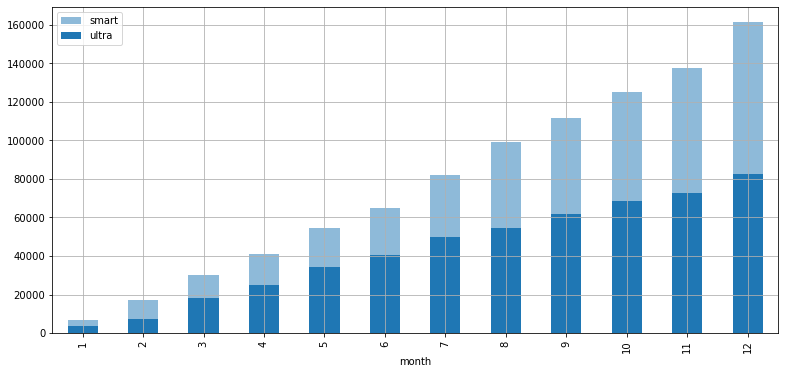

In [66]:
ax=tariff_smart.plot(y='duration_call',figsize=(13,6),style='o-',kind='bar',label='smart', alpha=0.5)
tariff_ultra.plot(y='duration_call',grid=True,figsize=(13,6),style='o-',kind='bar',label='ultra',ax=ax)